# Retail Sales Data – Exploratory Data Analysis (EDA)
### Objective:
The goal of this project is to perform Exploratory Data Analysis (EDA) on a retail sales dataset to understand customer behavior, sales patterns, and key factors affecting revenue using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn.


## Data Loading and Library Import


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

with zipfile.ZipFile('/content/archive (3).zip', 'r') as z:
    z.extractall('/content/')


In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Initial Data Exploration


In [ ]:
df.shape


(1000, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


We examine the dataset structure, size, column types, and sample records.


## Missing Values Analysis


In [ ]:
df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


The dataset contains no missing values, so no imputation is required.


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

## Statistical Summary


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


# **Retail Sales Data : Exploratory Data Analysis**

## Gender-wise Analysis



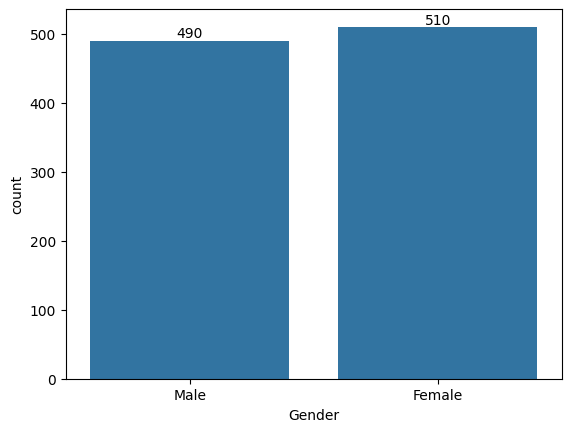

In [ ]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
   ax.bar_label(bars)

/tmp/ipython-input-1594710280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Amount', data=sales_gen, palette='pastel')


Text(0.5, 1.0, 'Impact of Gender on Total Sales')

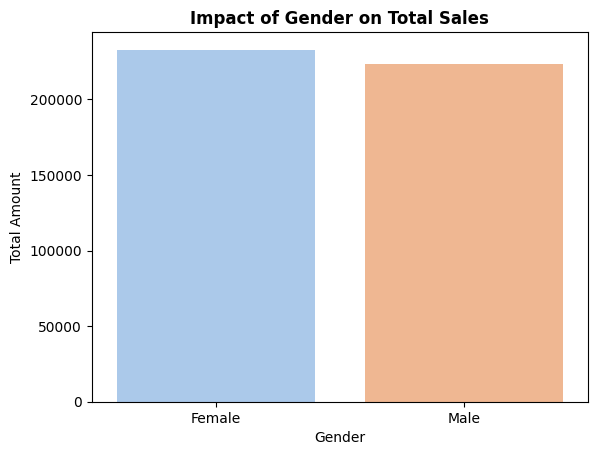

In [ ]:
sales_gen=df.groupby(['Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Gender', y='Total Amount', data=sales_gen, palette='pastel')
plt.title("Impact of Gender on Total Sales", fontweight='bold')



Female customers contribute slightly higher total sales compared to male customers, indicating stronger purchasing power.


## Age Group Analysis


/tmp/ipython-input-3620102108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Total Amount', data=df, palette='Set3')


<Figure size 800x500 with 0 Axes>

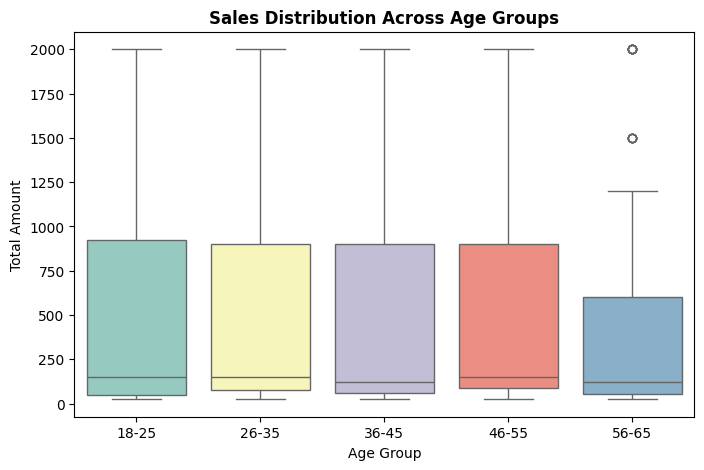

In [ ]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.boxplot(x='Age Group', y='Total Amount', data=df, palette='Set3')
plt.title("Sales Distribution Across Age Groups", fontweight='bold')
plt.show()

/tmp/ipython-input-3830594303.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_gen=df.groupby(['Age Group'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)


<Axes: xlabel='Age Group', ylabel='Total Amount'>

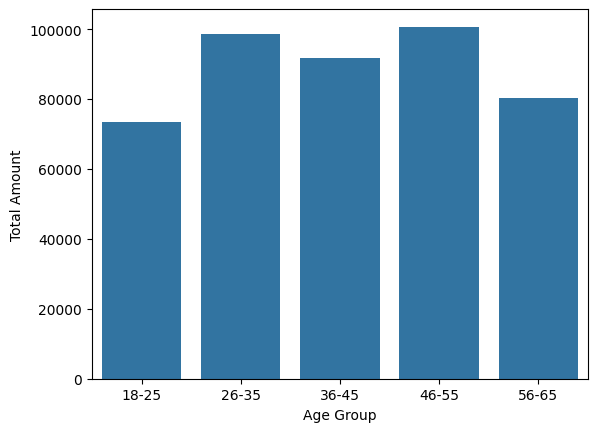

In [ ]:
sales_gen=df.groupby(['Age Group'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Age Group',y='Total Amount',data=sales_gen)


Customers in the age group 46–55 generate the highest revenue, especially females.



## Product Category Analysis


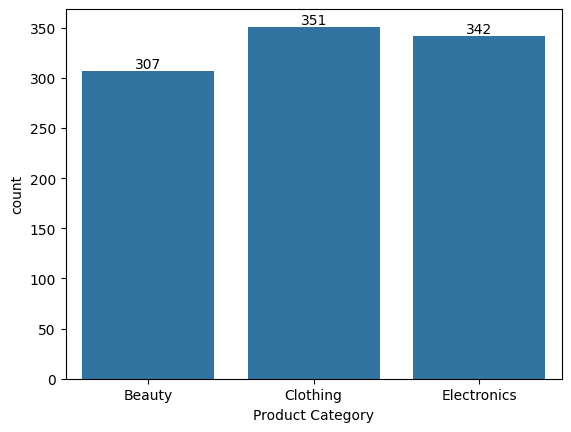

In [ ]:
ax=sns.countplot(x='Product Category',data=df)
for bars in ax.containers:
   ax.bar_label(bars)

<Figure size 800x500 with 0 Axes>

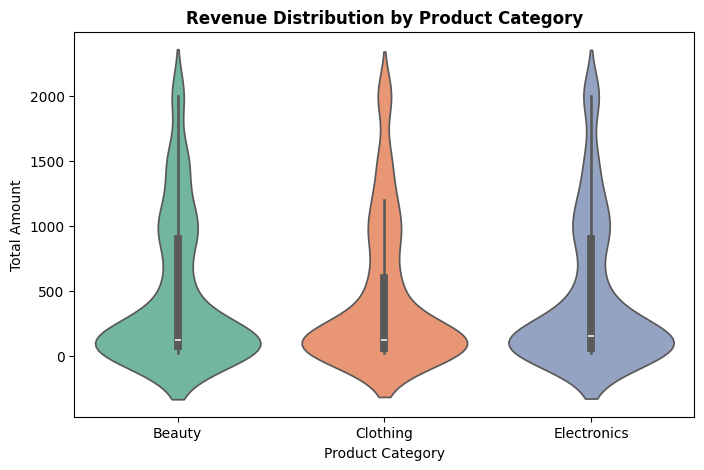

In [ ]:
sales_gen=df.groupby(['Product Category'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.violinplot(
    x='Product Category',
    y='Total Amount',
    data=df,
    hue='Product Category',
    palette='Set2',
    legend=False
)
plt.title("Revenue Distribution by Product Category", fontweight='bold')
plt.show()



Electronics shows the widest revenue variation with higher-value purchases, while Clothing and Beauty have more consistent sales.

## Quantity-wise Sales Analysis


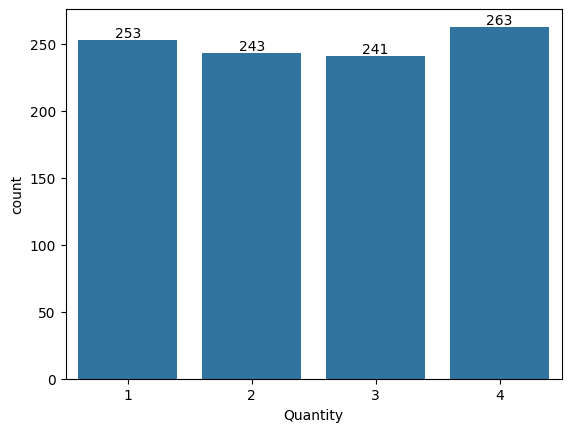

In [ ]:
ax=sns.countplot(x='Quantity', data=df)
for bars in ax.containers:
   ax.bar_label(bars)

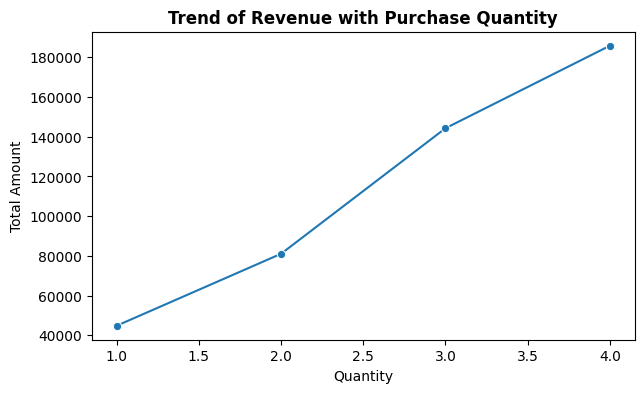

In [ ]:
sales_gen=df.groupby(['Quantity'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
plt.figure(figsize=(7,4))
sns.lineplot(x='Quantity', y='Total Amount', data=sales_gen, marker='o')
plt.title("Trend of Revenue with Purchase Quantity", fontweight='bold')
plt.show()


Higher quantities contribute more to total revenue, though most purchases are made in smaller quantities.


## Price per Unit Analysis


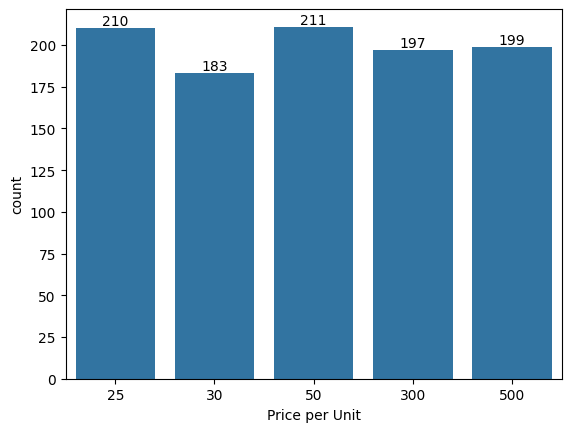

In [ ]:
ax=sns.countplot(x='Price per Unit',data=df)
for bars in ax.containers:
   ax.bar_label(bars)

/tmp/ipython-input-2768158416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price per Unit', y='Total Amount', data=sales_gen, palette='muted')


Text(0.5, 1.0, 'Revenue Contribution by Price Range')

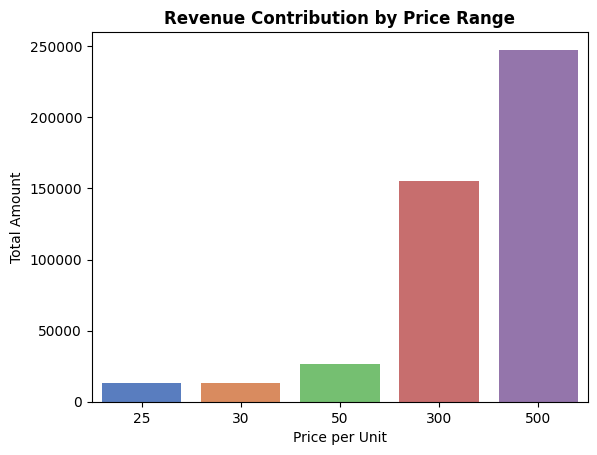

In [ ]:
sales_gen=df.groupby(['Price per Unit'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Price per Unit', y='Total Amount', data=sales_gen, palette='muted')
plt.title("Revenue Contribution by Price Range", fontweight='bold')



Higher-priced products generate more revenue despite fewer transactions.


## Total Sales Distribution


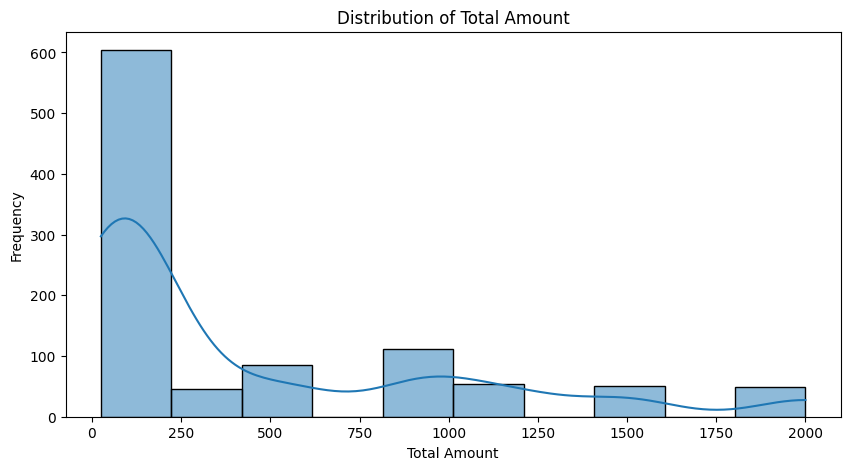

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total Amount'], bins=10, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


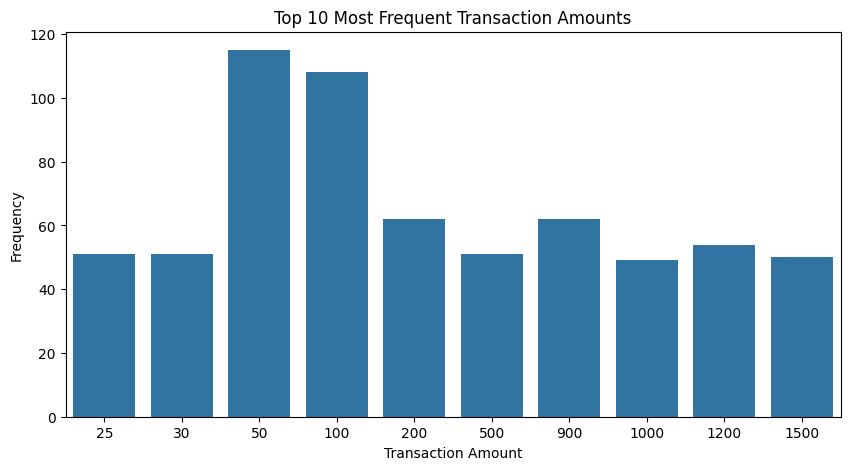

In [ ]:
sales_gen = df['Total Amount'].value_counts().head(10).reset_index()
sales_gen.columns = ['Transaction Amount', 'Frequency']
plt.figure(figsize=(10,5))
sns.barplot(x='Transaction Amount',y='Frequency',data=sales_gen)
plt.title('Top 10 Most Frequent Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Most transactions fall in the lower price range, but a few high-value transactions significantly impact total revenue.


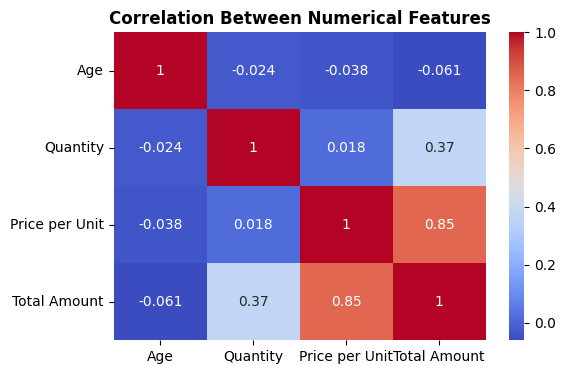

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['Age','Quantity','Price per Unit','Total Amount']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between Numerical Features", fontweight='bold')
plt.show()


##**Final Conclusion**

This exploratory data analysis provided insights into customer demographics, purchasing behavior, and product performance.
Key findings include:
- Female customers contribute higher sales.
- Middle-aged customers (46–55 years) generate maximum revenue.
- Electronics is the top-performing product category.
- High-priced items significantly impact overall revenue.

This analysis can help businesses improve targeting, pricing strategies, and inventory planning.
